# Clustering analysis

**Desired outcome of the homework.**
* In this homework we will look at Titanic dataset from https://www.kaggle.com/c/titanic/data.
* The idea is to perform clustering analysis on the dataset!
    

**Required Python libraries:**
* Numpy (www.numpy.org) 
* Matplotlib (matplotlib.org)
* Scikit-learn (scikit-learn.org).


**NOTE**
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

## Problem 1 (100 points): Clustering analysis on Titanic dataset

Data preproccessing: Load the Titanic.csv dataset and implement the following tasks (more details about the dataset here: https://www.kaggle.com/c/titanic/data):

Step 1. Create new dataframe with colums that will determine clusters, please drop the columns "Name", "Ticket", "Fare", and "Embarked", 

Step 2. Fill NaN values with 0

Step 3. Encode Sex colum to 0 and 1 with LabelEncoder (similar to HW4 problem 2 which uses OrdinalEncoder instead): https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

Step 4. Use PCA for dimensionality reduction (we only need 2 dimensions left), so we can plot datapoints easily: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html, 

    example code:
    - reduction_pca = PCA(n_components=2)
    - reduced_features = reduction_pca.fit_transform(features)

In [160]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

titanic_dataset = pd.read_csv("titanic.csv")

set_to_use = titanic_dataset
set_to_use = set_to_use.drop('Name', axis=1)
set_to_use = set_to_use.drop('Ticket', axis=1)
set_to_use = set_to_use.drop('Fare', axis=1)
set_to_use = set_to_use.drop('Embarked', axis=1)

set_to_use.fillna(0, inplace=True)
print(set_to_use.head())

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_sex = encoder.fit_transform(set_to_use.iloc[:, 3])
set_to_use['Sex'] = encoded_sex

features = set_to_use.iloc[:, 1:-1].values
print(features)

from sklearn.decomposition import PCA
reduction_pca = PCA(n_components=2)
reduced_features = reduction_pca.fit_transform(features)
print(reduced_features)

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch Cabin
0            1         0       3    male  22.0      1      0     0
1            2         1       1  female  38.0      1      0   C85
2            3         1       3  female  26.0      0      0     0
3            4         1       1  female  35.0      1      0  C123
4            5         0       3    male  35.0      0      0     0
[[ 0.  3.  1. 22.  1.  0.]
 [ 1.  1.  0. 38.  1.  0.]
 [ 1.  3.  0. 26.  0.  0.]
 ...
 [ 0.  3.  0.  0.  1.  2.]
 [ 1.  1.  1. 26.  0.  0.]
 [ 0.  3.  1. 32.  0.  0.]]
[[ -1.81534951   0.20248572]
 [ 14.21517966   0.45727768]
 [  2.19501631  -0.54673631]
 ...
 [-23.81573216   0.94447716]
 [  2.2300951   -0.65020941]
 [  8.19408599  -0.56771408]]


(1) After preprocessing above, please apply K-means clustering to the data(i.e., reduced_features). Print the centroid for each cluster. Plot all the clusters with different colors using scatter plot. (Note that after PCA, there are only 2 features left, it is easy to plot all the datapoints.)

In [161]:
reduction_pca = PCA(n_components=2)
reduced_features = reduction_pca.fit_transform(features)

In [162]:
from sklearn.cluster import KMeans

In [163]:

km = KMeans(n_clusters=5)
clusters = km.fit(reduced_features)
clusters

KMeans(n_clusters=5)

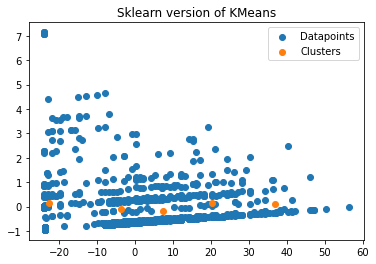

In [164]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], label='Datapoints')
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], label='Clusters')
plt.title("Sklearn version of KMeans")
plt.legend()
plt.show()

In [165]:
reduced_features.shape

(891, 2)

In [166]:
clusters.cluster_centers_

array([[ -3.55585101,  -0.10161391],
       [ 20.40166879,   0.15568667],
       [-22.6707669 ,   0.13760433],
       [  7.26957844,  -0.16324169],
       [ 36.77858312,   0.12392474]])

(2) Please apply K-means clustering to the data (n-clusters=5). Print the centroid for each cluster. Plot all the clusters with different colors using scatter plot. What did you find?

In [167]:
import numpy as np
import random

class KMeans_numpy(object):
    #INPUT: n_clusters - number of clusters that algortihm will try to find
    #       tolerance -  number when difference between prev cluster and new cluster is less then this number we will stop algo
    #       max_iter - how many times cetroids will move
    def __init__(self, n_clusters=2, tolerance = 0.001, max_iter = 300):
        self.k_clusters = n_clusters
        self.tol = tolerance
        self.max_iter = max_iter
    
    #TRAIN/FIT function, used to find the best positions for our clusters
    #
    #INPUT: X - fetures of dataset in which we are trying to find clusters
    def fit(self, X):
        #Starting clusters will be random members from X set
        self.centroids = []
        
        for i in range(self.k_clusters):
            #this index is used to acces random element from input set
            index = random.randint(1, len(X)-1)
            self.centroids.append(X[index])
        
        for i in range(self.max_iter):  
            #storing previous values of centroids
            prev_centroids = self.centroids
            #This will be dict for ploting data later on
            #with it we can find data points which are in the some cluster
            self.clustered_data = {}
            #Centroids values for this iteration
            cen_temp = []
            
            for centroid in range(len(self.centroids)):
                #creating empty list of elements for current cluster/centroid
                list_of_closer_samples = []
                
                for k in range(len(X)):
                    helper_list = []
                    for j in range(self.k_clusters):
                        #caluclating euclidian distance between current X value and all centroids in our list
                        helper_list.append(self.euclidian_distance(self.centroids[j], X[k]))
                    
                    #if minimal distance between curent value and centroid that we are currently interested in
                    #store value to the list of examples for that centroid
                    if np.argmin(helper_list) == centroid:
                        list_of_closer_samples.append(X[k])   
                
                #New position of each cluster is calculated by mean of all examples closest to it
                cen_temp.append(np.average(list_of_closer_samples, axis=0))
                
                self.clustered_data[centroid] = list_of_closer_samples

            #check if it is optimized
            optimized = True
            for c in range(len(self.centroids)):
                original_centroid = prev_centroids[c]
                current_centroid = cen_temp[c]
                #checking if % of change between old position and new position is less then tolerance (0.001 by default)
                if np.sum((current_centroid - original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False
                    self.centroids = cen_temp
                    
            if optimized:
                break
        #return final clusters values [optional, it is only used for graph]
        c = self.centroids
        return c, self.clustered_data
    
    #euclidian distance between points
    def euclidian_distance(self, centroid, x_current):
        return np.sqrt(np.sum(np.power((centroid - x_current), 2)))
    
    #INPUT: X_test set - set of data to test our clusters on
    def predict(self, Xtest):
        pred = []
        for i in range(len(Xtest)):
            help_list = []
            for j in range(len(self.centroids)):
                help_list.append(self.euclidian_distance(self.centroids[j], Xtest[i]))
            pred.append(np.argmin(help_list))
        return pred

In [168]:
kmm = KMeans_numpy(n_clusters=5, tolerance=0.00001)

In [169]:
# Add your code here
clusters, clustered_data = kmm.fit(reduced_features)

In [170]:
clusters = np.array(clusters)

In [171]:
cluster_one_data = np.array(clustered_data[0])
cluster_two_data = np.array(clustered_data[1])
cluster_three_data = np.array(clustered_data[2])
cluster_four_data = np.array(clustered_data[3])
cluster_five_data = np.array(clustered_data[4])

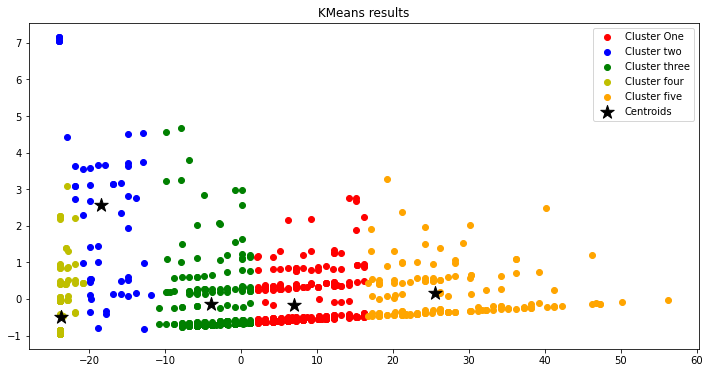

In [172]:
plt.figure(figsize=(12, 6))
plt.scatter(cluster_one_data[:, 0], cluster_one_data[:, 1], c='r', label='Cluster One')
plt.scatter(cluster_two_data[:, 0], cluster_two_data[:, 1], c='b', label='Cluster two')
plt.scatter(cluster_three_data[:, 0], cluster_three_data[:, 1], c='g', label='Cluster three')
plt.scatter(cluster_four_data[:, 0], cluster_four_data[:, 1], c='y', label='Cluster four')
plt.scatter(cluster_five_data[:, 0], cluster_five_data[:, 1], color='orange', label='Cluster five')
plt.scatter(clusters[:, 0], clusters[:, 1], marker='*', s=200, color='black', label='Centroids')
plt.title("KMeans results")
plt.legend()
plt.show()

In [173]:
'''The Euclidean distance is used to find the distance between centroids and data points measured. Because K-means minimizes within-cluster variance and f you look at the definition of variance, it is identical to the sum of squared Euclidean distances from the center.Our objective function is to minimize the total distance from every point in each of the k clusters to the centroid of that cluster. Like most algorithms, we need to iteratively guess different values of the centroid to figure out the best arrangement of clusters. Thus, these plots allow us to do the same.The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of squared criterion.'''

'The Euclidean distance is used to find the distance between centroids and data points measured. Because K-means minimizes within-cluster variance and f you look at the definition of variance, it is identical to the sum of squared Euclidean distances from the center.Our objective function is to minimize the total distance from every point in each of the k clusters to the centroid of that cluster. Like most algorithms, we need to iteratively guess different values of the centroid to figure out the best arrangement of clusters. Thus, these plots allow us to do the same.The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of squared criterion.'

(3) To determine the best number of clusters in the data, we can apply k-means with varying number of clusters from 1 to 20 and compute their corresponding sum-of-squared errors (i.e., SSE, the sum of squared distances of samples to their closest cluster center). Plot the `Number of Clusters vs. SSE`. What did you find? 

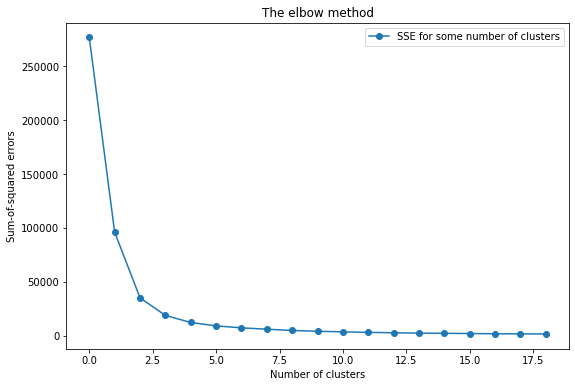

In [174]:
from sklearn.cluster import KMeans
sse = []
for i in range(1, 20):
    test_sklearn = KMeans(n_clusters=i)
    test_sklearn.fit(reduced_features)
    sse.append(test_sklearn.inertia_)
plt.figure(figsize=(9, 6))
plt.plot(sse, marker='o', label='SSE for some number of clusters')
plt.title("The elbow method")
plt.xlabel('Number of clusters')
plt.ylabel("Sum-of-squared errors")
plt.legend()
plt.show()

In [175]:
'''One method to validate the number of clusters is the elbow method. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k and for each value of k, calculate the Sum of squared errors. As can be observed from the above plot that when k=4 , WCSS(Within Cluster sum of Squares) is much low.On further increasing the value of k there is slow decrease in the error. The line chart looks like an arm and the elbow, i.e k=4 is the best.  The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster.'''

'One method to validate the number of clusters is the elbow method. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k and for each value of k, calculate the Sum of squared errors. As can be observed from the above plot that when k=4 , WCSS(Within Cluster sum of Squares) is much low.On further increasing the value of k there is slow decrease in the error. The line chart looks like an arm and the elbow, i.e k=4 is the best.  The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster.'